# HUVEC and Breast Cancer Case Study
## Upstream Regulator Analysis

----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 11th January, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Transcription Factors](#tf)
4. [Background Network](#bn)
5. [HUVEC](#huvec)
    1. [Load DEG's](#loadhuvec)
    2. [Calculate enrichment and activation state of TFs](#pzhuvec)
    3. [Compare the Ingenuity Article's results to Ours](#comphuvec)
    4. [Display Our results](#displayhuvec)
6. [Breast Cancer](#brca)
    1. [Load DEG's](#loadbrca)
    2. [Calculate enrichment and activation state of TFs](#pzbrca)
    3. [Compare the Ingenuity Article's results to Ours](#compbrca)
    4. [Display Our results](#displaybrca)

## Background
<a id='background'></a>

This notebook provides validation for our Upstream Regulator Analysis (URA) modules. Our modules are inspired by Ingenuity System's [Ingenuity Upstream Regulator Analysis in IPA®](http://pages.ingenuity.com/rs/ingenuity/images/0812%20upstream_regulator_analysis_whitepaper.pdf); this test case is inpired by Ingenuity System's corresponding paper, [Causal analysis approaches in Ingenuity Pathway Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3928520/). This paper analyses two sets of Differencially Expressed Genes (DEG's): one from a breast cancer tumor and the other from Human Umbilical Vein Endothelial Cells (HUVEC). We run our version of URA on these same breast cancer and HUVEC DEG's, however using the [STRING database](https://string-db.org/) human protein interaction network as our background network. 

## Import packages
<a id='import'></a>

In [1]:
# uncomment if you have not pip-installed network_bio_toolkit

#import sys
#code_path = '../../network_bio_toolkit'
#sys.path.append(code_path)
#import Upstream
#reload(Upstream)

from network_bio_toolkit import Upstream

In [2]:
# User preferences
symbol = 'symbol'
entrez = 'entrez'

ura = Upstream.Upstream(symbol)

## Transcription Factors
<a id='tf'></a>

Load our list of Transcription Factors (TF) we want to analyze. Gene symbols will be in all caps. 

In [3]:
ura.easy_load_TF_list('../../TF_databases/TF_database_URA.csv')
TF_list = ura.get('TF_list')
TF_list = TF_list + ['TNF', 'IFNG', 'LBP'] # known regulators of interest missing from our TF databases
ura.set('TF_list', TF_list)
len(ura.get('TF_list'))

../../network_bio_toolkit\create_graph.py:46: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df2 = pd.DataFrame.from_csv(csv_filename)


3986

## Background Network
<a id='bn'></a>

Load our background network, available on the [STRING website](https://string-db.org/cgi/download.pl?UserId=9BGA8WkVMRl6&sessionId=HWUK6Dum9xC6&species_text=Homo+sapiens), and keep only our the information about our TF's. 

The function load_STRING_to_digraph can load any species' "protein actions" database from STRING. Just ensure your TF list and DEG list have the same naming convention as you background network (Homo Sapiens use all caps, Mus Musculus only capitalizes the first letter, etc.) Inconsistent naming can effect your results.

In [4]:
filename = "../../background_networks/9606.protein.actions.v10.5.txt"
confidence_filter = 400
ura.load_STRING_to_digraph(filename, confidence_filter)
DG_TF = ura.get('DG_TF')

print "\nNumber of interactions: " + str(len(list(DG_TF.edges())))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7374...done.
Finished.
34 input query terms found dup hits:
	[(u'ENSP00000447879', 2), (u'ENSP00000364076', 2), (u'ENSP00000313571', 2), (u'ENSP00000368927', 2),
314 input query terms found no hit:
	[u'ENSP00000376684', u'ENSP00000289352', u'ENSP00000202788', u'ENSP00000373637', u'ENSP00000367802',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.

Number of interactions: 29428


## HUVEC##
<a id='huvec'></a>

### Load HUVEC DEG's ###
<a id='loadhuvec'></a>

In [5]:
# DEG's
filename_huvec = '../../DEG_databases/geo2r_GSE2639_huvec.txt'

# TF's found to be statistically significant in Ingenuity Systems URA article
huvec_genes = ['TNF','IFNG','LBP', 'NFKB1', 'NFKB2', 'REL', 'RELA', 'RELB', 'PCBP3', 'PCBP2', 'PCBP1', 'PCBP4', 'NFKBIA']

# add DEG information to STRING background network
ura.create_DEG_list(filename_huvec, p_value_filter = 0.3)

../../network_bio_toolkit\create_graph.py:366: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(filename, sep = sep)


### Calculate enrichment and activation state of TFs
<a id='pzhuvec'></a>

For a detailed explination of our p-value and z-score calculation functions, see our URA_Basic_Example notebook

In [6]:
# Enrichment of every TF with respect to its targets
ura.tf_target_enrichment_calc()

# Enrichment of TF's themselves
ura.tf_enrichment_calc()   
ura.get('tf_enrichment')

TF_ENRICHMENT    0.000067
dtype: float64

In [7]:
# calculate z-scores
ura.tf_zscore(bias_filter = 0.25)

### Compare the Ingenuity Article's results to Ours
<a id='comphuvec'></a>

These are the TF's found to be most relevant according to the Ingenuity Pathway Analysis paper. Optimally, these genes would rank very high. A rank of 0 is always best, while the rank associated with a z-score of zero is the worst. 

In this case, IFNG anf TNF are high ranking, therefore show coordination between our results and the Ingenuity article's results. LBP, PCBP1, PCBP2, PCBP4, and RELB have z-scores of zero, meaning not enough information exists about these genes to calculate a true z-score for them. PCBP3 has a NaN z-score because it is not in the graph.

PCBP3 is not a valid transcription factor in our graph.


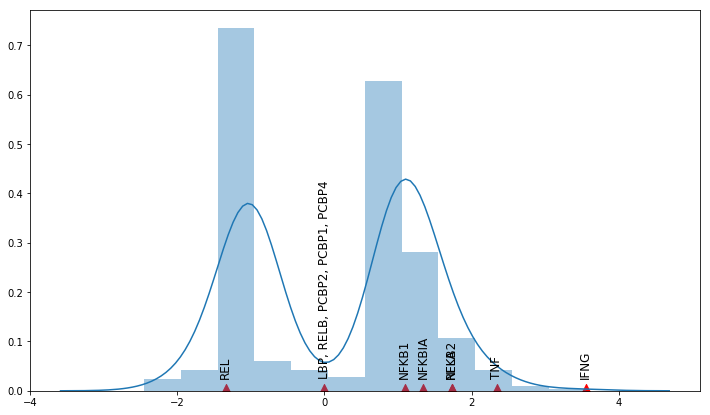

In [8]:
ura.compare_genes(huvec_genes)

### Display Our results
<a id='displayhuvec'></a>

These are the most relevant TF's according to our analysis. Optimally, these should match the huvec genes defined above. However, using a different background network produces discrepancies.

IFNG, TNF, and TNFAIP3 show coordination between our results and the Ingenuity article's results.

In [9]:
top_act_huvec = ura.top_values(act = True, abs_value = False, top = 10)
top_inh_huvec = ura.top_values(act = False, abs_value = False, top = 10)
display(top_act_huvec)
display(top_inh_huvec)

,z-score,(adj) p-value,(log) fold change
IFNG,3.549648,0.943412,-0.1720
CTF1,3.000000,0.947242,0.4870
STAT4,2.645751,0.990425,0.0383
STAT5A,2.529822,0.344762,1.0600
TNF,2.342606,0.658852,1.1200
HIF1A,2.236068,0.965412,0.1130
FOS,2.236068,0.625963,-0.8010
IRF3,2.236068,0.972756,0.1810
GATA3,2.236068,0.323464,-0.8050
SPG7,2.236068,NaN,NaN


,z-score,(adj) p-value,(log) fold change
PPARA,-2.449490,0.931975,0.26200
TNFAIP3,-2.000000,0.000369,2.80000
DDX41,-2.000000,0.884567,0.21500
CACNA2D4,-2.000000,NaN,NaN
CACNA2D2,-2.000000,0.994112,-0.04400
GPSM1,-1.941451,NaN,NaN
SIRT1,-1.897367,0.998068,0.00695
NR3C1,-1.732051,0.853714,0.30100
NKX2-5,-1.732051,0.847805,0.99000
IRF8,-1.732051,0.969826,0.14900


## Breast Cancer ###
<a id='brca'></a>

### Load Breast Cancer DEG's
<a id='loadbrca'></a>

In [10]:
urb = ura.copyUpstream()

In [11]:
# DEG's
filename_brca = '../../DEG_databases/geo2r_GSE11352_brca_48hours.txt'

# TF's found to be statistically significant in Ingenuity Systems URA article
brca_genes = ['ESR1', 'FSH', 'MEK', 'BRD4', 'MYC', 'MARK1', 'IL1B','NCOA3','PGR', 
              'EGR1', 'HIF1A', 'NR3C1','CTNNB1','TP53','SMARCE1','STAT5B']

# add DEG information to STRING background network
urb.create_DEG_list(filename_brca, p_value_filter = 0.05)

### Calculate enrichment and activation state of TFs
<a id='pzbrca'></a>

In [12]:
# Enrichment of every TF with respect to its targets
urb.tf_target_enrichment_calc()

# Enrichment of TF's themselves
urb.tf_enrichment_calc()   
urb.get('tf_enrichment')

TF_ENRICHMENT    0.009482
dtype: float64

In [13]:
# calculate z-scores
urb.tf_zscore(bias_filter = 0.25)

### Compare the Ingenuity Article's results to Ours
<a id='compbrca'></a>
TP53, MYC, and ESR1 are foud to be highly ranking, showing coordination between our results and the Ingenuity article's results.

FSH is not a valid transcription factor in our graph.
MEK is not a valid transcription factor in our graph.
MARK1 is not a valid transcription factor in our graph.
IL1B is not a valid transcription factor in our graph.


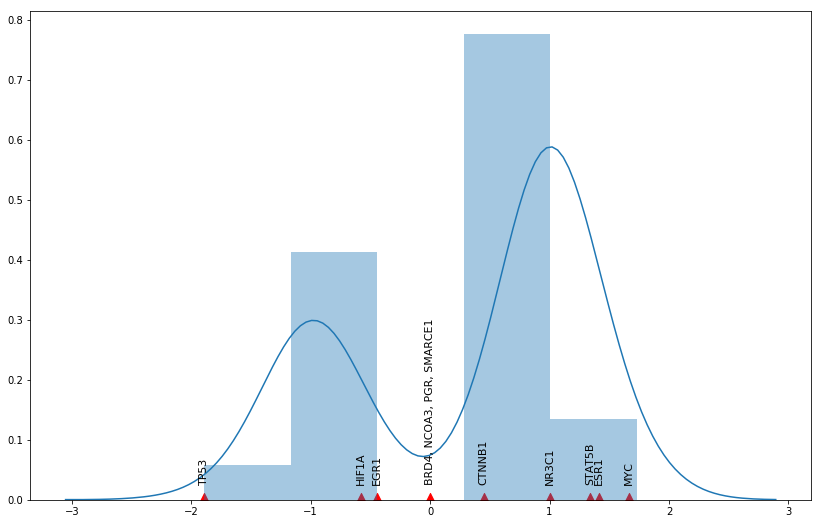

In [14]:
urb.compare_genes(brca_genes, fig_size = (14, 9), font_size = 11)

### Display Our results
<a id='displaybrca'></a>
MYCN, MYC, ESR1, and TP53 show coordination between our results and the Ingenuity article's results.

Four out of five of our top activating genes, in particular MYCN, are associated with breast cancer according to literature. Our top three inhibiting genes, in particular FOXO3, are also associated with breast cancer according to literature.

In [15]:
top_act_brca = urb.top_values(act = True, abs_value = False, top = 10)
top_inh_brca = urb.top_values(act = False, abs_value = False, top = 10)
display(top_act_brca)
display(top_inh_brca)

,z-score,(adj) p-value,(log) fold change
STAT1,1.732051,0.6421,0.136488
MYCN,1.732051,0.0545,-3.033888
STAT3,1.732051,0.3654,-0.324608
MYC,1.666667,0.1006,0.807643
CCNA2,1.414214,0.1376,0.569129
NFATC2,1.414214,0.1698,0.800778
STAT2,1.414214,0.6577,0.219203
PHKB,1.414214,0.0907,-0.781048
SREBF2,1.414214,0.5486,0.314303
PHKA1,1.414214,0.7130,-0.288041


,z-score,(adj) p-value,(log) fold change
TP53,-1.889822,0.6567,0.131119
NR1H3,-1.414214,0.6998,0.123408
EGR2,-1.414214,0.9456,0.223257
AKT1,-1.414214,0.7268,0.109646
FOXO3,-1.414214,0.4660,-0.221403
FOXO4,-1.414214,0.7937,0.403570
CEBPB,-1.000000,0.1646,0.497956
NR1H2,-1.000000,0.9669,-0.020007
RFX1,-1.000000,0.2920,0.932776
JUND,-1.000000,0.4683,0.220135


In [16]:
urb.vis_tf_network('MYCN',
                   directed_edges = True,
                   node_spacing = 1200,
                   graph_id = 0) 

In [17]:
urb.vis_tf_network('FOXO3',
                   directed_edges = True,
                   node_spacing = 2300,
                   graph_id = 68) 